<a href="https://colab.research.google.com/github/shreydan/fastai-starters/blob/main/finetune_interpreters_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 32.2 MB/s 


In [2]:
from fastai.vision.all import *

In [3]:
ds_path = untar_data(URLs.PETS)
files = get_image_files(ds_path/'images')

def get_breed(name):
    breed = re.findall('^(.*)_\d+.jpg',name)
    return breed[0].lower()

labels = [get_breed(f.name) for f in files]

In [4]:
dls = ImageDataLoaders.from_lists(ds_path/'images', 
                                  files, 
                                  labels,
                                  item_tfms= Resize(384),
                                  batch_tfms=aug_transforms(size=224),
                                  )

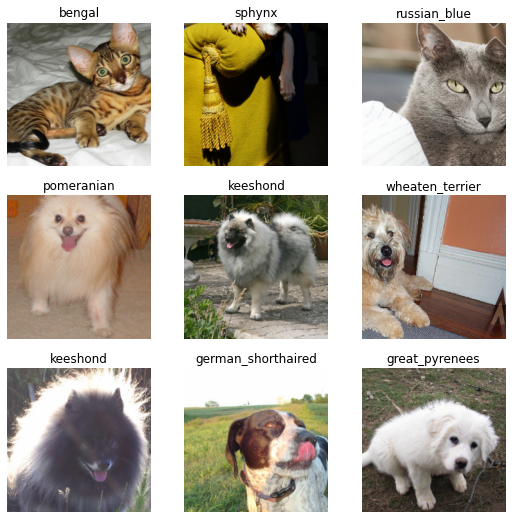

In [5]:
dls.show_batch()

In [6]:
learner = vision_learner(dls, arch='convnext_tiny_in22k')

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


In [7]:
learner.fine_tune(1,2e-4)

epoch,train_loss,valid_loss,time
0,3.344798,0.883300,01:28


epoch,train_loss,valid_loss,time
0,1.216560,0.512925,03:51


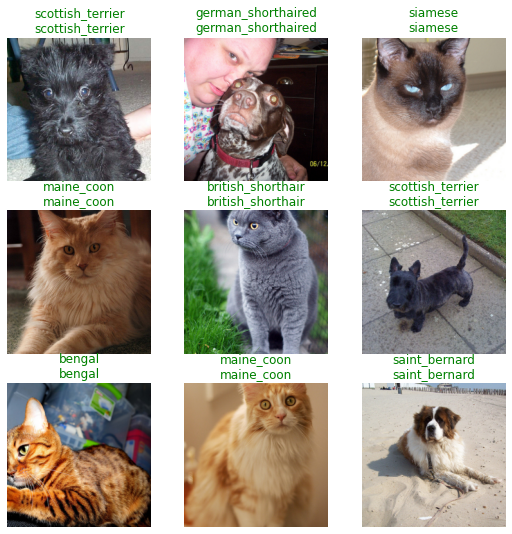

In [8]:
learner.show_results()

In [9]:
interpreter = Interpretation.from_learner(learner)

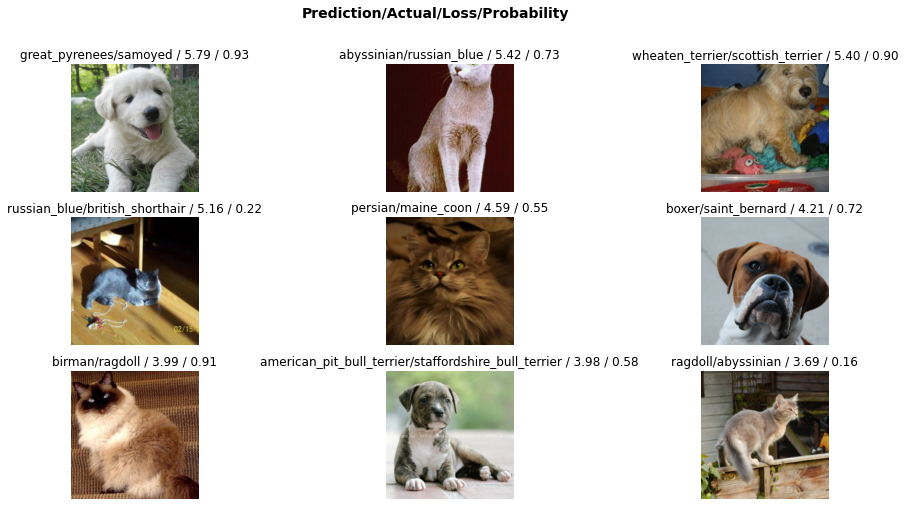

In [17]:
interpreter.plot_top_losses(9, figsize=(16,8))

In [18]:
classification_interpreter = ClassificationInterpretation.from_learner(learner)

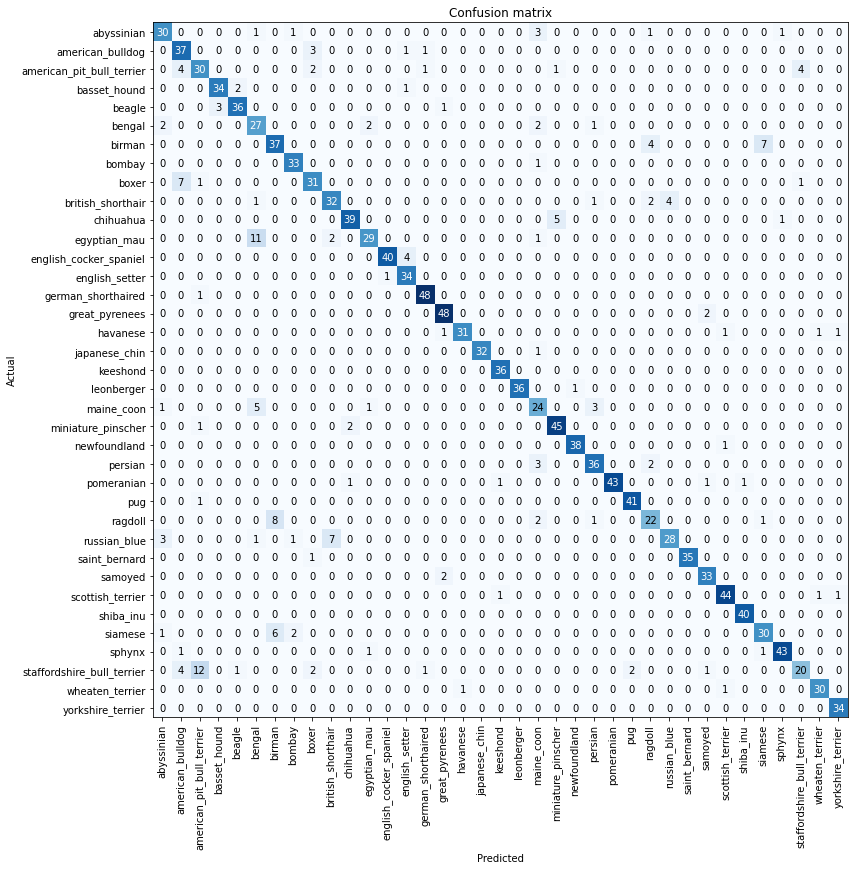

In [21]:
classification_interpreter.plot_confusion_matrix(figsize=(12,12))

In [22]:
classification_interpreter.most_confused()

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 12),
 ('egyptian_mau', 'bengal', 11),
 ('ragdoll', 'birman', 8),
 ('birman', 'siamese', 7),
 ('boxer', 'american_bulldog', 7),
 ('russian_blue', 'british_shorthair', 7),
 ('siamese', 'birman', 6),
 ('chihuahua', 'miniature_pinscher', 5),
 ('maine_coon', 'bengal', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('birman', 'ragdoll', 4),
 ('british_shorthair', 'russian_blue', 4),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('abyssinian', 'maine_coon', 3),
 ('american_bulldog', 'boxer', 3),
 ('beagle', 'basset_hound', 3),
 ('maine_coon', 'persian', 3),
 ('persian', 'maine_coon', 3),
 ('russian_blue', 'abyssinian', 3),
 ('american_pit_bull_terrier', 'boxer', 2),
 ('basset_hound', 'beagle', 2),
 ('bengal', 'abyssinian', 2),
 ('bengal', 'egyptian_mau', 2),
 ('bengal', 'maine_coon', 2),
 ('briti

(('beagle',
  TensorBase(4),
  TensorBase([2.3852e-04, 6.7433e-04, 1.7448e-03, 7.5754e-03, 8.5390e-01,
              2.6059e-03, 8.9260e-04, 1.0670e-04, 1.0816e-03, 6.3479e-04,
              5.4680e-03, 6.9752e-04, 1.6876e-03, 4.6181e-03, 9.9628e-03,
              4.2234e-03, 4.1896e-03, 1.8938e-03, 5.8237e-04, 5.5120e-04,
              3.5984e-04, 1.7948e-03, 1.1455e-03, 3.9200e-04, 3.8266e-04,
              7.5606e-04, 1.0826e-03, 1.6386e-03, 7.0924e-02, 1.2094e-03,
              2.8024e-03, 1.1469e-03, 4.8315e-04, 2.5894e-04, 1.3955e-03,
              9.5816e-03, 1.3219e-03])),
 <matplotlib.image.AxesImage at 0x7f0c2a0e8650>)

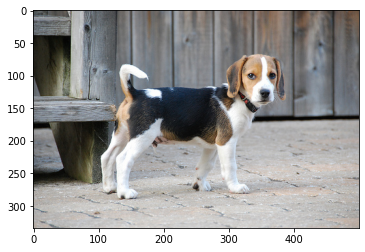

In [27]:
learner.predict(files[123]), plt.imshow(Image.open(files[123]))